<a href="https://colab.research.google.com/github/Karthik01018/Support-Vector-Machine-/blob/main/Support_Vector_Machines_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

**Load the dataset**

In [2]:
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

**Split into training and test sets**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Standardize the features**

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Visualize the data**

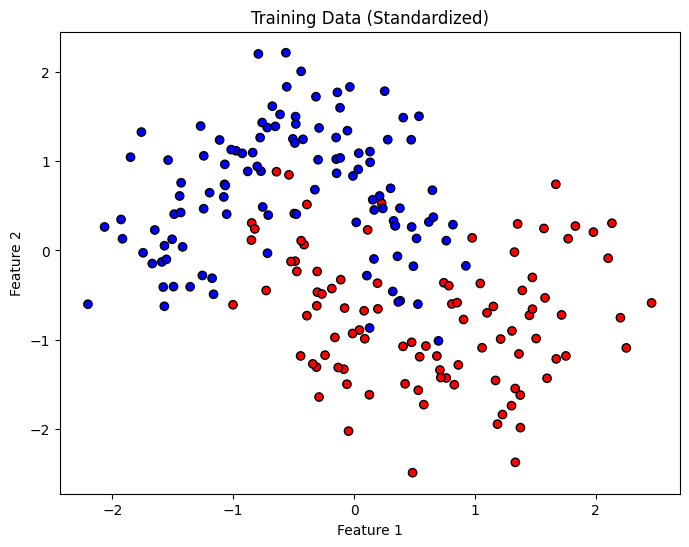

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='bwr', edgecolors='k')
plt.title("Training Data (Standardized)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

**Train SVM with Linear Kernel**

In [8]:
svm_linear = SVC(kernel='linear', C=1, random_state=42)
svm_linear.fit(X_train_scaled, y_train)

SVC(C=1, kernel='linear', random_state=42)

**Define a grid of hyperparameters for C and gamma.**

In [12]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}
svm_rbf = SVC(kernel='rbf', random_state=42)
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best parameters for RBF SVM:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters for RBF SVM: {'C': 1, 'gamma': 10}
Best cross-validation accuracy: 0.9095238095238095


**The best estimator from grid search**


In [13]:
svm_rbf_best = grid_search.best_estimator_

**Visualization: Decision Boundary Plot Function**

In [15]:
def plot_decision_boundary(clf, X, y, title="Decision Boundary"):
    # Define the grid range
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# 1. Load and prepare the dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Linear SVM and cross-validation
svm_linear_cv = SVC(kernel='linear', C=1, random_state=42)
scores_linear = cross_val_score(svm_linear_cv, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Linear SVM CV Accuracy Scores:", scores_linear)
print("Mean Accuracy (Linear):", scores_linear.mean())

# 4. RBF SVM hyperparameter tuning
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
grid_search = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# 5. RBF SVM and cross-validation with best params
svm_rbf_cv = SVC(kernel='rbf',
                 C=grid_search.best_params_['C'],
                 gamma=grid_search.best_params_['gamma'],
                 random_state=42)
scores_rbf = cross_val_score(svm_rbf_cv, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("RBF SVM Best Parameters:", grid_search.best_params_)
print("RBF SVM CV Accuracy Scores:", scores_rbf)
print("Mean Accuracy (RBF):", scores_rbf.mean())


Linear SVM CV Accuracy Scores: [0.83333333 0.92857143 0.73809524 0.85714286 0.88095238]
Mean Accuracy (Linear): 0.8476190476190476
RBF SVM Best Parameters: {'C': 1, 'gamma': 10}
RBF SVM CV Accuracy Scores: [0.95238095 0.9047619  0.9047619  0.92857143 0.85714286]
Mean Accuracy (RBF): 0.9095238095238095
